# Graph Analysis
We will analyze the built-in Zachary's Karate Club graph provided by NetworkX.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

## Load the Graph
We use the built-in `karate_club_graph()` from NetworkX.

In [2]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)

## Basic Graph Analysis
We compute the number of nodes, edges, the graph diameter, and the average clustering coefficient.

In [3]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
diameter = nx.diameter(G)
avg_clustering = nx.average_clustering(G)

print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Diameter: {diameter}")
print(f"Average Clustering Coefficient: {avg_clustering:.3f}")

Number of Nodes: 34
Number of Edges: 78
Diameter: 5
Average Clustering Coefficient: 0.571


# Calculate the centrality metrics

In [4]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank = nx.pagerank(G)


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

In [5]:
centralities = {
    "Degree Centrality": nx.degree_centrality(G),
    "Betweenness Centrality": nx.betweenness_centrality(G),
    "Closeness Centrality": nx.closeness_centrality(G),
    "Eigenvector Centrality": nx.eigenvector_centrality(G),
    "PageRank": nx.pagerank(G)
}

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

# Here we summarize the metrics for each of these nodes

In [6]:
metrics = []
for node in G.nodes():
    metrics.append({
        'node': node,
        'degree': G.degree[node],
        'degree_centrality': degree_centrality[node],
        'betweenness': betweenness_centrality[node],
        'closeness': closeness_centrality[node],
        'eigenvector': eigenvector_centrality[node],
        'pagerank': pagerank[node]
    })


NameError: name 'pagerank' is not defined

# Here we sort by degree and we get the top 10

In [7]:
top_10 = sorted(metrics, key=lambda x: x['degree'], reverse=True)[:10]


# Let's print the top 10 nodes by degree and their metrics

In [8]:
print("Top 10 nodes by degree:")
for m in top_10:
    print(f"Node {m['node']:2d}: degree={m['degree']}, degree_centrality={m['degree_centrality']:.2f}, "
          f"betweenness={m['betweenness']:.2f}, closeness={m['closeness']:.2f}, "
          f"eigenvector={m['eigenvector']:.2f}, pagerank={m['pagerank']:.2f}")

Top 10 nodes by degree:


## Summary of Findings
- Number of Nodes: 34
- Number of Edges: 78
- Diameter: 5 — the longest shortest path between any two nodes.
- Average Clustering Coefficient: ~0.571 — indicates moderate clustering behavior, showing how interconnected a node's neighbors are.
- Node 0 has the highest closeness and betweenness and is one of the most influential nodes in the network


In [9]:
# Create node size and color lists
node_size = [1000 * degree_centrality[n] for n in G.nodes()]
node_color = [betweenness_centrality[n] for n in G.nodes()]

In [10]:
# Identify top 10 nodes by degree centrality
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_node_labels = {n: f"Node {n}" for n, _ in top_nodes}

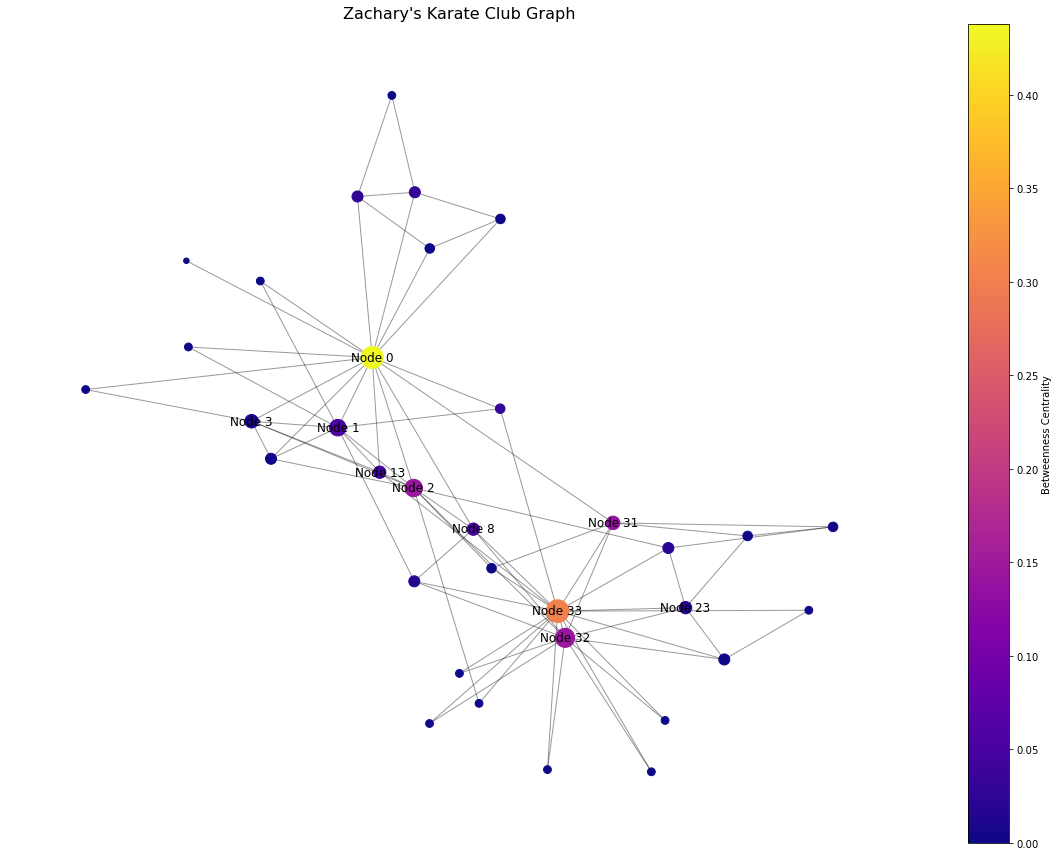

In [11]:
# Choosing a colormap
custom_cmap = plt.cm.plasma  # Other options: inferno, coolwarm, cividis, etc.

# Drawing the network
plt.figure(figsize=(16, 12))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=custom_cmap)
nx.draw_networkx_labels(G, pos, labels=top_node_labels, font_size=12, font_color='black')

# Adding a colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, 
                           norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])
plt.colorbar(sm, label="Betweenness Centrality")

# Adding the title and displaying the plot
plt.title("Zachary's Karate Club Graph", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Video Link: https://www.youtube.com/watch?v=23zH7d0EmT8 